# **Week 1**

## **DAY 1**

##### **What is Machine Learning ?**

1. Field of study that gives computers the ability to learn withour being explicitly programed. *(Arthur Samuel)*

2. A computer program is said to learn from experience **E** with respect to some class of tasks **T** and performance measure **P**, if its performance at tasks in **T**, as measured by **P**, improves with experience **E**. *(Tom Mitchell)*
> **Example: playing checkers.**
> * **E** = the experience of playing many games of checkers
> * **T** = the task of playing checkers.
> * **P** = the probability that the program will win the next game.

##### **The three main paradigms in machine learning.**
1. Supervised Learning
2. Unsupervised Learning
3. Reinforcement learning

###### **Supervised Learning**
* Right Answer were given.
* f: X -> y
* **Regression**: Predict Contnious Value Output (*House Price Prediction*)
* **Classification**: Predict Descrete Value Output (*Dog Breed Classifier*)

###### **Unsupervised Learning**
* No Label Data (Right Answer) Given
* **Clustring**: Dividing the population or data points into a number of groups (*Market Segmentation*)
* **Non-Clustring**: Find structure in messy data (such as the identification of individual voices and music from a mesh of sounds at a (*Cocktail party*)

###### **Reinforcement Learning**
> In some application output of the system is a sequence of action, in such a case action is not important, important is the policy that is the sequience of correct action to reach the goal.

> **Examples** 
* *Game Playing*
* *Navigating Robot*

## **DAY 2**

###### **Linear Regression with One Variable**
> Linear regression with one variable is also known as **"univariate linear regression."**. Univariate linear regression is used when you want to predict a single output value **y** from a single input value **x**. We're doing supervised learning here, so that means we already have an idea about what the input/output cause and effect should be.

###### **Model Representation**
> **Notations**
> * $m$ = Number of Examples
> * $x$ = Input Variable/Feature
> * $y$ = Output Variable/Label
> * $(x,y)$ = Record
> * $(x^{i},y^{i})$ = ith training example   
> * $\theta_{i}$ = ith parameter

###### **The Hypothesis Function**
> $\hat{y} = h_{(\theta)} = \theta_{0} + \theta_{1} * x $
>> This is Looks like Straight Line Equation were $\theta_{0}$ is y intercept and $\theta_{1}$ is slope, both called Parameters, Our main Objective is to find out Best or Optimal Values for this parameters. In other words, we are trying to create a function called $h_{(\theta)}$ that is trying to map our input data (the $x's$) to our output data (the $y's$).

###### **Cost Function**
> We can measure the accuracy of our hypothesis function by using a **cost function**. This takes an average (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's compared to the actual output y's.

> $ J(\theta_{0},\theta_{1}) = \frac{1}{2m} \sum_{i=0}^{m} (h_{\theta}({x_i}) - y_{i})^2 $

> This function is otherwise called the **"Squared error function"**, or **"Mean squared error"**. The mean is halved $(\frac{1}{2m})$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term.

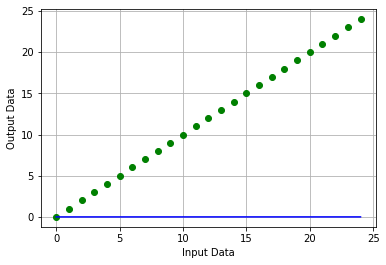

Cost: 97.98040098


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def data_generate(m): 
  X = np.array(range(m)).reshape(-1,1) # Input Data
  y = np.array(range(m)).reshape(-1,1) # Output Data (Generated Thorugh Random)
  theta = np.array([[0],[0.0001]]) # Parameters
  m = X.shape[0] # Total Examples
  Xbais = np.insert(X,0,1,axis=1) # Bais Term Which is add infron of Input Data set
  return X,y,theta,Xbais

X,y,theta,Xbais = data_generate(25)

# Hypothesis Funtion
def hyp_function(X,theta):
  h = X.dot(theta) 
  return h

h = hyp_function(Xbais, theta)

plt.plot(X,y,'go')
plt.plot(X,h,'b')
plt.xlabel('Input Data')
plt.ylabel('Output Data')
plt.grid(True)
plt.show(True)

# Cost Funtion
def Cost_fucntion(h, y):
  error = h-y
  sqr_error = np.power(error,2)
  sum_sqr_error = np.sum(sqr_error)
  J = sum_sqr_error*(1/(2*y.shape[0]))
  return J

print(f"Cost: {Cost_fucntion(h, y)}")

If we try to think of it in visual terms, our training data set is scattered on the x-y plane. We are trying to make straight line (defined by $ h_\theta(x)$, which passes through this scattered set of data. Our objective is to get the best possible line. The best possible line will be such so that the average squared vertical distances of the scattered points from the line will be the least. In the best case, the line should pass through all the points of our training data set. In such a case the value of $J(\theta_0, \theta_1)$ will be 0.

###### **Cost Vs. $\theta_{1}$**
> Assume $\theta_{0}$ is set to 0 and we only vary $\theta_{1}$, Look at this (below) Convex Function ($y$-axis = $J(\theta_{1})$ and $x$-axis = $\theta_{1}$) only have one **Gloabal minimum** where $J(\theta_{1})$ = 0, That's our main Goal to reach it thorugh **Gradient Descet**

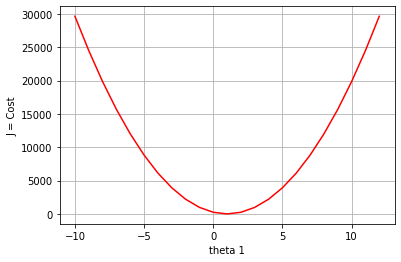

In [ ]:
r = 23
theta_0 = np.zeros((1,r))
theta_1 = np.array(range(-10,13)).reshape(-1,1)
theta = np.insert(theta_1,0,theta_0.T,axis=0).reshape(2,r).T

cost_list = []
for t in theta:
  h = Xbais.dot(t.reshape(-1,1))
  cost_list.append(Cost_fucntion(h,y))

plt.plot(range(-10,13),cost_list,'r')
plt.xlabel('theta 1')
plt.ylabel('J = Cost')
plt.grid(True)
plt.show(True)

###### **Why Square Mean Error instead of Absolute mean Error ?**
* We can not calculate gradient of absolute functio because **it has not derivate at level 0**

## **DAY 3**

##### **Gradient Descent**

So we have our **hypothesis function** and we have a way of measuring **cost function** how well it fits into the data. Now we need to estimate the parameters in hypothesis function. That's where gradient descent comes in.

We will know that we have succeeded when our cost function is at the very bottom of the pits **global minimum** in our graph, i.e. when its value is the minimum.

The way we do this is by taking the derivative (the tangential line to a function) of our cost function $\frac{\delta}{\delta\theta}J(\theta)$. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent, and the size of each step is determined by the parameter $\alpha$, which is called the **learning rate**.

###### **Algorithm**

* Start with some $\theta_0,\theta_1$.
* Keep changing $\theta_0,\theta_1$ to reduce $J(\theta_0,\theta_1)$.
* Untill we hopefully endup at a minimum.

$Repeat \{$
> $\theta_{j} := \theta_{j}-\alpha*\frac{\delta}{\delta\theta}J(\theta_{0},\theta_{1})$

$\}$

###### **Gradient Descent for Linear Regression**

When we derivate our cost function with respect to $\theta_0$ and $\theta_1$ our equation will be changed, square term will cencel out with $\frac{1}{2}$ and our final output will look like this.


$Repeat \{$
> $temp_0 := \theta_{0}-\alpha*\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x_i)-y_i)$

> $temp_1 := \theta_{1}-\alpha*\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x_i)-y_i)x_i)$

> $\theta_{0} = temp_0$

> $\theta_{1} = temp_1$

$\}$

> Note that we use temp vairbale to save our calculation then simultaneously update both parameters and we have separated out the two cases for $\theta_j$ into separate equations for $\theta_0$ and $\theta_1$; and that for $\theta_1$  we are multiplying $x_{i}$ at the end due to the derivative.

###### **Code**

In [ ]:
def Gradient_Descent(X, y, theta, alpha=0.01, itr=10):
  J_history = []
  theta_values = []
  counter = 0
  while counter < itr:
    h = hyp_function(Xbais,theta) # Hypothesis Function
    J = Cost_fucntion(h, y) # Cost  function

    # Not Part of Algorithm
    theta_values.append(theta[1][0]) # Just for plot Cost Function Graph

    temp_0 = theta[0] - alpha * (1/m) * np.sum(h - y) # temp_0
    temp_1 = theta[1] - alpha * (1/m) * (h - y).T.dot(X) # temp_1  
    # Simultaniously Update
    theta[0] = temp_0
    theta[1] = temp_1

    J_history.append(J) # Save Cost History
    counter +=1

  return J_history, theta, theta_values

X,y,theta,Xbais = data_generate(10) # Generate Data
itr = 30
alpha=0.06
J_history,theta,theta_values = Gradient_Descent(X, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")

Cost: 0.0013004845990208943 
theta:
[[0.09310474]
 [0.9849504 ]]


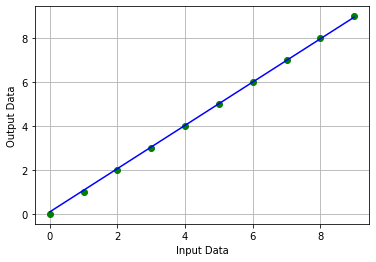

In [ ]:
# Plot Graph 
h = hyp_function(Xbais, theta)
plt.plot(X,y,'go')
plt.plot(X,h,'b')
plt.xlabel('Input Data')
plt.ylabel('Output Data')
plt.grid(True)
plt.show(True)

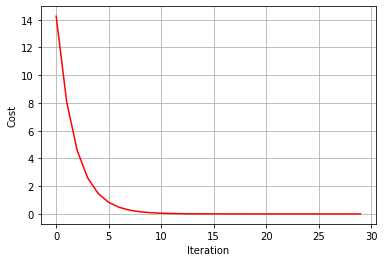

In [ ]:
# Plot Graph Cost Function Vs. Iteration
plt.plot(range(len(J_history)),J_history,'r')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show(True)

In [ ]:
def theta_cost(X,Y,theta,theta_values,itr,n):
    theta_copy = np.copy(theta)
    theta_copy[0] = 0
    J = []
    J2 = []

    for i in np.linspace(np.min(theta_values),np.max(theta_values),itr):
        theta_copy[1] = i
        h_error = X.dot(theta_copy)
        J.append(Cost_fucntion(y, h_error))

    for i in theta_values:
        theta_copy[1] = i
        h_error = X.dot(theta_copy)
        J2.append(Cost_fucntion(y, h_error))

    # Cost Function Vs. Theta1 Graph

    theta_1 = np.linspace(np.min(theta_values),np.max(theta_values),itr).reshape(-1,1)
    plt.figure(n)
    plt.plot(theta_1,J,'b')
    plt.plot(theta_values,J2,'r')
    plt.xlabel('theta_1')
    plt.ylabel('Cost')
    plt.legend('CT')
    plt.title('theta_1 Vs. Cost function')
    plt.grid(True)

###### **Variation in $\alpha$**

Cost: 1.2388873792365202e-05 
theta:
[[0.00922455]
 [0.99852892]]


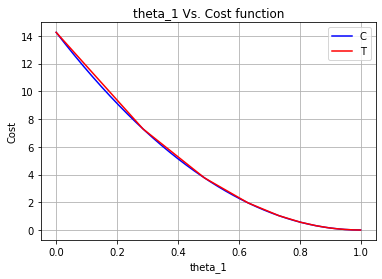

In [ ]:
# Alpha = 0.01 (Converging)
# Taking Little Steps towards global maximum 

X,y,theta,Xbais = data_generate(10) # Generate Data
itr = 999
alpha=0.01
J_history,theta,theta_values = Gradient_Descent(X, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")
theta_cost(Xbais,y,theta,theta_values,itr,1)

Cost: 1.478654091603827e-10 
theta:
[[3.16880740e-05]
 [9.99994947e-01]]


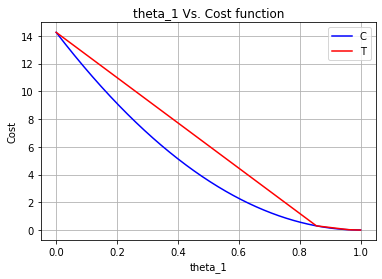

In [ ]:
# Alpha = 0.03 (Converging)
# Taking medium Steps towards global maximum 

X,y,theta,Xbais = data_generate(10) # Generate Data
itr = 999
alpha=0.03
J_history,theta,theta_values = Gradient_Descent(X, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")
theta_cost(Xbais,y,theta,theta_values,itr,1)

Cost: 3.0652713730820046e-19 
theta:
[[1.42838952e-09]
 [1.00000000e+00]]


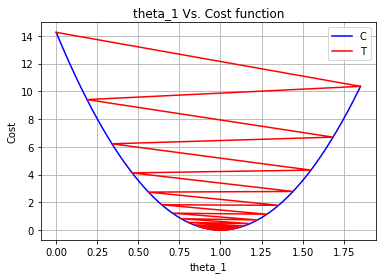

In [ ]:
# Alpha = 0.065 (Converging)
# Taking large Steps towards global maximum
# It's jumps from -ve derivate to +ve derivate 

X,y,theta,Xbais = data_generate(10) # Generate Data
itr = 999
alpha=0.065
J_history,theta,theta_values = Gradient_Descent(X, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")
theta_cost(Xbais,y,theta,theta_values,itr,1)

Cost: 3.1935385777758005e+39 
theta:
[[2.43377656e+18]
 [1.52612048e+19]]


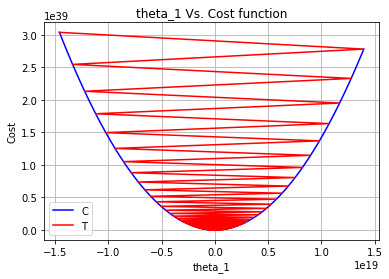

In [ ]:
# Alpha = 0.07 (Diverging)
# Taking large Steps towards Top
# Look at this Cost This is increasing in every step 

X,y,theta,Xbais = data_generate(10) # Generate Data
itr = 999
alpha=0.07
J_history,theta,theta_values = Gradient_Descent(X, y, theta, alpha, itr)
print(f"Cost: {J_history[-1]} \ntheta:\n{theta}")
theta_cost(Xbais,y,theta,theta_values,itr,1)

* if $\alpha$ is too small gradient descent can be slow.
* if $\alpha$ is too large, gradient descent can overshoot the minmum, it may fall or diverge.
* As we approch a local minimum gradient descent will automatically take smaller step, because its common sense that whe slope will close to decrease derivate term becaome smaller then previous term, so no need to decrease $\alpha$ over time.
* If we already at local minimum our algorithm doesn't take single step ($\alpha * 0$).